## Astro 503 HW1 -- Achintya Krishnan

In [1]:
#%matplotlib notebook

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import pandas as pd
from scipy.integrate import simpson

### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy. 

The point of this assignment is to:
- get comfortable with photon energy, frequency, and wavelength - calculate power and luminosity
- know now to convert magnitudes, fluxes, photon counts.
- start basic Python scripts and plotting

# Q1. Make plot of the electromagnetic spectrum using Python. (30 pts)
- Your plot should have multiple x-axes - one for wavelength (in meters), one for frequency (in Hz), one for energy (in eV)
    (hint: `gridspec` or `subplots` in general can be used to do this. See if you can find something useful here: https://matplotlib.org/stable/gallery/index) (10 pts)
- axes should be lograthmic, and each of these axes should have ticklabels that are exponential above or below (5 pts)
- the wavelength axes should also have more conventional SI units for km, mm, micron, nm, Angstrom, and picometer labelled (5 pts)
- label each region of the EM spectrum (10 pts)

 Something like this: 

<img src="https://aktinovolia.com/wp-content/uploads/aktinovolia.com-radiation-chart-electromagnetic-spectrum-rf-em-spectrum-rf-electromagnetic-3-.jpg">

or (except you should have energy too) 

<img src="https://multiphaseism.wordpress.com/wp-content/uploads/2013/05/electromagnetic_spectrum.jpg">

# Remember to save your script. Stay organized. You will be reusing code.

You are encouraged to add your own flourishes to the plot.
Joseph is empowered to give out 5 points as he sees fit for aesthetics. 

Keep this plot handy. You should be able to intuitively convert between these values in your head. 

C:\Users\iamac\AppData\Local\Temp\ipykernel_7072\8061608.py:21: RuntimeWarning: divide by zero encountered in divide
  return c/x


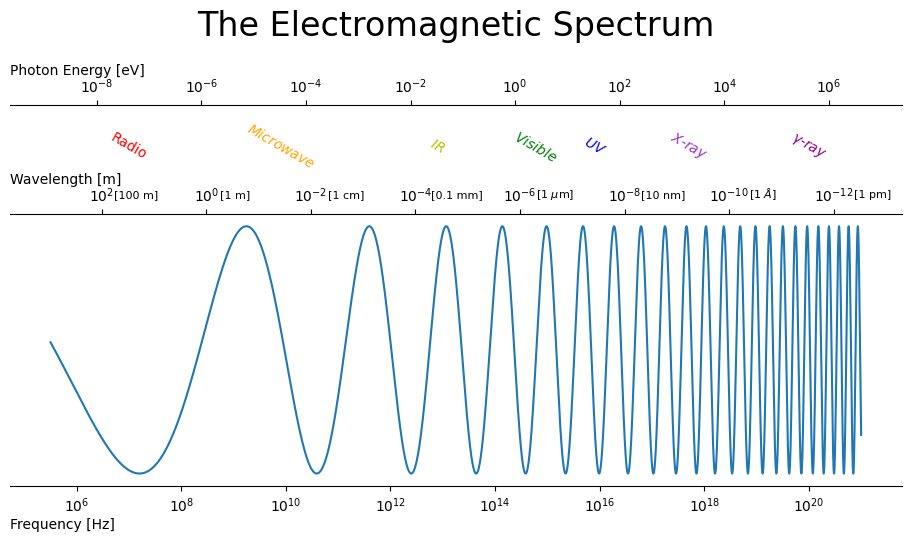

In [3]:
freq_manyVals = np.logspace(5.5,21, num=10**4)
freq_justPowers = np.logspace(5,21, num=17)
yvals = np.sin(np.exp((np.log10(freq_manyVals)-1)/4))
c=3e8
h = 4.136e-15 # in eV/Hz

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(9, 5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

ax.semilogx(freq_manyVals, yvals)
ax.set_xlabel('Frequency [Hz]', loc='left', labelpad=2)
ax.set_title('The Electromagnetic Spectrum', fontsize=24, pad=20)


def freqToWlen(x):
    return c/x

def freqToEn(x):
    return h*x

secax = ax.secondary_xaxis('top', functions=(freqToWlen, freqToWlen))
secax.set_xlabel('Wavelength [m]', loc='left', labelpad=2)

secax_x2 = ax.secondary_xaxis(1.4, functions=(freqToEn, freqToEn))
secax_x2.set_xlabel('Photon Energy [eV]', loc='left', labelpad=2)

ax.text(10**7, 1.65, r'Radio', fontsize=10, color='red', ha='center', va='center', rotation=330)
ax.text(8*10**9, 1.65, r'$Microwave$', fontsize=10, color='orange', ha='center', va='center', rotation=330)
ax.text(8*10**12, 1.65, r'$IR$', fontsize=10, color='y', ha='center', va='center', rotation=330)
ax.text(6*10**14, 1.65, r'$Visible$', fontsize=10, color='green', ha='center', va='center', rotation=330)
ax.text(8*10**15, 1.65, r'$UV$', fontsize=10, color='blue', ha='center', va='center', rotation=330)
ax.text(5*10**17, 1.65, r'$X$-$ray$', fontsize=10, color='darkorchid', ha='center', va='center', rotation=330)
ax.text(10**20, 1.65, r'$\gamma$-$ray$', fontsize=10, color='darkmagenta', ha='center', va='center', rotation=330)

ax.text(4.5*c/10**2, 1.235, '[100 m]', ha='center', fontsize=8)
ax.text(3.5*c/10**0, 1.235, '[1 m]', ha='center', fontsize=8)
ax.text(4.8*c/10**(-2), 1.235, '[1 cm]', ha='center', fontsize=8)
ax.text(6.33*c/10**(-4), 1.235, r'[0.1 mm]', ha='center', fontsize=8)
ax.text(4.75*c/10**(-6), 1.235, r'[1 $\mu$m]', ha='center', fontsize=8)
ax.text(5.37*c/10**(-8), 1.235, '[10 nm]', ha='center', fontsize=8)
ax.text(4.37*c/10**(-10), 1.235, r'[1 $\AA$]', ha='center', fontsize=8)
ax.text(5.6*c/10**(-12), 1.235, '[1 pm]', ha='center', fontsize=8)

plt.show()

# Q2. Dealing with Data from Multiple Sources - adding passbands and atmospheric transmission (30 pts)

### 2.1
Get the Optical Atmospheric Transmission using the `specreduce` package
    `pip install specreduce`
    https://specreduce.readthedocs.io/en/latest/extinction.html

Note that the optical transmission curves do not include the effect of molecules as the website tells you.
Follow their instructions to add 2.3mm of Preciptiable Water Vapr at an Airmass of 1.0 to the optical transmission. 

Get NIR and MIR transmission curves from here (we're not using MIR this week, but you'll use this code next HW as well)
	http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra
(Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)


### 2.2
Get the LSST Filter Transmissions (ugrizy, filter only) from here:
http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse

and the IRTF (\[JHK\]_MK, filter only) transmissions from here:
https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

## !Please note that the filter tranmissions are determined by counting photons, not measuing energy! 

### 2.3

Finally, get the SEDs of three stars from CALSPEC:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
and for the actual data:
https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/

(There is no M5V but there is a M3.5V star - BD-11 3759)


Finally, reconstruct a plot like this (set the wavelength ranges appropriately for the filters I've listed)
<img src="https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png">

except replace the middle panel with the atmospheric transmission from your interpolator.

Something like this for the atmosphere plot (but until the wavelength you need): 
<img src="https://www.researchgate.net/profile/Joseph-Shaw-3/publication/260940640/figure/fig3/AS:296902361927680@1447798447054/Atmospheric-transmittance-versus-wavelength-calculated-with-Modtran5-for-a-zenith.png">

In [4]:
# Read in the files that we were told to download/obtain above in instructions for 2.1-2.3

#Optical atmospheric transmission (2.3 mm pwv, airmass 1)
Opt_atm_trans = ascii.read("2.3mm_pwv_transmission.txt")

#NIR atmospheric transmission (Cerra Pachon, 2.3mm pwv, airmass 1)
NIR_atm_trans = ascii.read("NIR_transmission_Cerro_Pachon_2.3mmWater_arimass1.txt")
NIR_atm_trans["col1"]*=10**4

#LSST filters
LSSTu_filt = ascii.read("LSST_LSST.u_filter.dat")
LSSTg_filt = ascii.read("LSST_LSST.g_filter.dat")
LSSTr_filt = ascii.read("LSST_LSST.r_filter.dat")
LSSTi_filt = ascii.read("LSST_LSST.i_filter.dat")
LSSTz_filt = ascii.read("LSST_LSST.z_filter.dat")
LSSTy_filt = ascii.read("LSST_LSST.y_filter.dat")

#IRTF filters
J_MK_IRTF_filt = ascii.read("J_MK_IRTF_filter_transmission.txt")
J_MK_IRTF_filt["WL (Angs)"] = J_MK_IRTF_filt["WL (Micrometers)"]*10**4
J_MK_IRTF_filt["Transmission (-)"] = J_MK_IRTF_filt["Transmission (%)"]/100
J_MK_IRTF_filt = pd.DataFrame({
    "WL (Angs)": np.array(J_MK_IRTF_filt["WL (Angs)"]),
    "Transmission (-)": np.array(J_MK_IRTF_filt["Transmission (-)"])
})
J_MK_IRTF_filt = J_MK_IRTF_filt.sort_values(by='WL (Angs)')

H_MK_IRTF_filt = ascii.read("H_MK_IRTF_filter_transmission.txt")
H_MK_IRTF_filt["WL (Angs)"] = H_MK_IRTF_filt["WL (Micrometers)"]*10**4
H_MK_IRTF_filt["Transmission (-)"] = H_MK_IRTF_filt["Transmission (%)"]/100
H_MK_IRTF_filt = pd.DataFrame({
    "WL (Angs)": np.array(H_MK_IRTF_filt["WL (Angs)"]),
    "Transmission (-)": np.array(H_MK_IRTF_filt["Transmission (-)"])
})
H_MK_IRTF_filt = H_MK_IRTF_filt.sort_values(by='WL (Angs)')

K_MK_IRTF_filt = ascii.read("K_MK_IRTF_filter_transmission.txt")
K_MK_IRTF_filt["WL (Angs)"] = K_MK_IRTF_filt["WL (Micrometers)"]*10**4
K_MK_IRTF_filt["Transmission (-)"] = K_MK_IRTF_filt["Transmission (%)"]/100
K_MK_IRTF_filt = pd.DataFrame({
    "WL (Angs)": np.array(K_MK_IRTF_filt["WL (Angs)"]),
    "Transmission (-)": np.array(K_MK_IRTF_filt["Transmission (-)"])
})
K_MK_IRTF_filt = K_MK_IRTF_filt.sort_values(by='WL (Angs)')

#3 star SEDs from CALSPEC
sun_SED = fits.open('sun_reference_stis_002.fits') #sun
sun_SED_table = Table(sun_SED[1].data)
sun_SED_table["Norm Flux"] = sun_SED_table['FLUX']/max(sun_SED_table['FLUX'])

Vega_SED = fits.open('alpha_lyr_stis_011.fits') #Vega
Vega_SED_table = Table(Vega_SED[1].data)
Vega_SED_table["Norm Flux"] = Vega_SED_table['FLUX']/max(Vega_SED_table['FLUX'])

BD113759_SED = fits.open('bd11d3759_stis_003.fits') #BD-11 3759
BD113759_SED_table = Table(BD113759_SED[1].data)
BD113759_SED_table["Norm Flux"] = BD113759_SED_table['FLUX']/max(BD113759_SED_table['FLUX'])

Text(0, 0.5, '$F_{\\lambda}/F_{\\lambda}^{max}$ [-]')

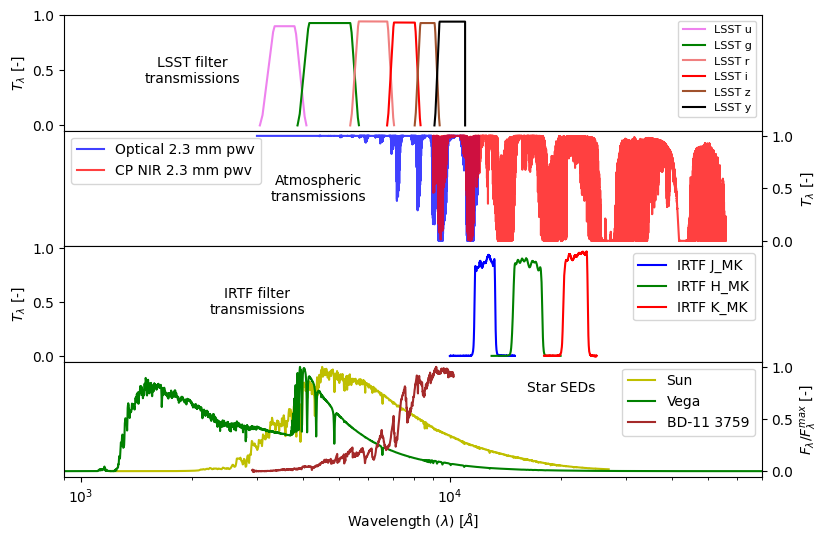

In [5]:
fig2,ax2 = plt.subplots(4,1, sharex=True)
fig2.set_size_inches(9,6)
plt.subplots_adjust(wspace=0, hspace=0)
plt.xlabel(r'Wavelength ($\lambda$) [$\AA$]')
plt.xscale('log')
plt.xlim(9*10**2, 7*10**4)

# Plot LSST filter transmission curves
ax2[0].plot(LSSTu_filt['col1'], LSSTu_filt['col2'], color='violet', label='LSST u')
ax2[0].plot(LSSTg_filt['col1'], LSSTg_filt['col2'], color='green', label='LSST g')
ax2[0].plot(LSSTr_filt['col1'], LSSTr_filt['col2'], color='lightcoral', label='LSST r')
ax2[0].plot(LSSTi_filt['col1'], LSSTi_filt['col2'], color='red', label='LSST i')
ax2[0].plot(LSSTz_filt['col1'], LSSTz_filt['col2'], color='sienna', label='LSST z')
ax2[0].plot(LSSTy_filt['col1'], LSSTy_filt['col2'], color='black', label='LSST y')
ax2[0].legend(fontsize=8)
ax2[0].text(2*10**3, 0.5, 'LSST filter\ntransmissions', ha='center', va='center')
ax2[0].set_ylabel(r'$T_{\lambda}$ [-]')
ax2[0].set_yticks([0, 0.5,1])

# Plot optical and NIR atmospheric transition
ax2[1].plot(Opt_atm_trans["wavelength"], Opt_atm_trans["transmission"], 'b-', label='Optical 2.3 mm pwv', alpha=0.75)
ax2[1].plot(NIR_atm_trans["col1"], NIR_atm_trans["col2"], 'r-', label='CP NIR 2.3 mm pwv', alpha=0.75)
ax2[1].legend(fontsize=10)
ax2[1].text(4.4*10**3, 0.5, 'Atmospheric\ntransmissions', ha='center', va='center')
ax2[1].yaxis.set_label_position("right")
ax2[1].yaxis.tick_right()
ax2[1].set_ylabel(r'$T_{\lambda}$ [-]')

# Plot IRTF filter transmission curves
ax2[2].plot(J_MK_IRTF_filt["WL (Angs)"], J_MK_IRTF_filt["Transmission (-)"], color='blue', label='IRTF J_MK')
ax2[2].plot(H_MK_IRTF_filt["WL (Angs)"], H_MK_IRTF_filt["Transmission (-)"], color='green', label='IRTF H_MK')
ax2[2].plot(K_MK_IRTF_filt["WL (Angs)"], K_MK_IRTF_filt["Transmission (-)"], color='red', label='IRTF K_MK')
ax2[2].legend(fontsize=10)
ax2[2].text(3*10**3, 0.5, 'IRTF filter\ntransmissions', ha='center', va='center')
ax2[2].set_ylabel(r'$T_{\lambda}$ [-]')

# Plot the (normalized) SEDs for the 3 stars
    # normalize by dividing by largest flux value in SED
ax2[3].plot(sun_SED_table['WAVELENGTH'], sun_SED_table['Norm Flux'], color='y', label='Sun')
ax2[3].plot(Vega_SED_table['WAVELENGTH'], Vega_SED_table['Norm Flux'], color='g', label='Vega')
ax2[3].plot(BD113759_SED_table['WAVELENGTH'], BD113759_SED_table['Norm Flux'], color='brown', label='BD-11 3759')
ax2[3].legend(fontsize=10)
ax2[3].text(2*10**4, 0.8, 'Star SEDs', ha='center', va='center')
ax2[3].yaxis.set_label_position("right")
ax2[3].yaxis.tick_right()
ax2[3].set_ylabel(r'$F_{\lambda}/F_{\lambda}^{max}$ [-]')

# Q3. Combine the filter transmission and your atmosphere transmission - we'll assume the mirror and CCDs are perfect over the entire wavelength range. Implement the integrals for flux and magnitude discussed in Lecture 3 as python code. (40 pts)

- You'll have to do something to `interpolate` measurements continuously across the full wavelength range you have across Optical to NIR (you can ignore the MIR file for now, but you'll want it next week)
- Make sure the units are consistent for both wavelength and transmission before you write your interpolator or address differences in some other way 
- You'll need to make sure your interpolator can match the wavelength spacing of the SEDs in Q2
- Rememeber that the intergrals intclude the transmission $T(\lambda)$, which is not normalized properly, so make sure to normalize your integral appropriately
- Normalize the synthetic flux in two ways
    1. such as Vega has magnitude 0 in each band.
    2. such that a synthetic AB source has magnitude 0 in each band

Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega in a table (columns = passbands, rows = star/system)

- 15 pts each for the Sun and BD-11 3759 (2 pts for the six optical bands, 1 pt each for JHK) 
- 10 pts for the AB mags of Vega (yes, I know there are 9 bands, not 10, but you can have the one extra)

In [6]:
# Interpolate stars' SEDs across each filter
    # see Narayan 2019 - eq 5
#######################
#Sun
sun_LSSTu_fluxes = np.interp(x=LSSTu_filt["col1"], xp=sun_SED_table["WAVELENGTH"], fp=sun_SED_table["FLUX"], 
                             left=0, right=0)
sun_LSSTg_fluxes = np.interp(x=LSSTg_filt["col1"], xp=sun_SED_table["WAVELENGTH"], fp=sun_SED_table["FLUX"], 
                             left=0, right=0)
sun_LSSTr_fluxes = np.interp(x=LSSTr_filt["col1"], xp=sun_SED_table["WAVELENGTH"], fp=sun_SED_table["FLUX"], 
                             left=0, right=0)
sun_LSSTi_fluxes = np.interp(x=LSSTi_filt["col1"], xp=sun_SED_table["WAVELENGTH"], fp=sun_SED_table["FLUX"], 
                             left=0, right=0)
sun_LSSTz_fluxes = np.interp(x=LSSTz_filt["col1"], xp=sun_SED_table["WAVELENGTH"], fp=sun_SED_table["FLUX"], 
                             left=0, right=0)
sun_LSSTy_fluxes = np.interp(x=LSSTy_filt["col1"], xp=sun_SED_table["WAVELENGTH"], fp=sun_SED_table["FLUX"], 
                             left=0, right=0)

sun_IRTF_JMK_fluxes = np.interp(x=J_MK_IRTF_filt["WL (Angs)"], xp=sun_SED_table["WAVELENGTH"],
                                    fp=sun_SED_table["FLUX"], left=0, right=0)
sun_IRTF_HMK_fluxes = np.interp(x=H_MK_IRTF_filt["WL (Angs)"], xp=sun_SED_table["WAVELENGTH"],
                                    fp=sun_SED_table["FLUX"], left=0, right=0)
sun_IRTF_KMK_fluxes = np.interp(x=K_MK_IRTF_filt["WL (Angs)"], xp=sun_SED_table["WAVELENGTH"],
                                    fp=sun_SED_table["FLUX"], left=0, right=0)

#######################
#Vega
Vega_LSSTu_fluxes = np.interp(x=LSSTu_filt["col1"], xp=Vega_SED_table["WAVELENGTH"], fp=Vega_SED_table["FLUX"], 
                             left=0, right=0)
Vega_LSSTg_fluxes = np.interp(x=LSSTg_filt["col1"], xp=Vega_SED_table["WAVELENGTH"], fp=Vega_SED_table["FLUX"], 
                             left=0, right=0)
Vega_LSSTr_fluxes = np.interp(x=LSSTr_filt["col1"], xp=Vega_SED_table["WAVELENGTH"], fp=Vega_SED_table["FLUX"], 
                             left=0, right=0)
Vega_LSSTi_fluxes = np.interp(x=LSSTi_filt["col1"], xp=Vega_SED_table["WAVELENGTH"], fp=Vega_SED_table["FLUX"], 
                             left=0, right=0)
Vega_LSSTz_fluxes = np.interp(x=LSSTz_filt["col1"], xp=Vega_SED_table["WAVELENGTH"], fp=Vega_SED_table["FLUX"], 
                             left=0, right=0)
Vega_LSSTy_fluxes = np.interp(x=LSSTy_filt["col1"], xp=Vega_SED_table["WAVELENGTH"], fp=Vega_SED_table["FLUX"], 
                             left=0, right=0)

Vega_IRTF_JMK_fluxes = np.interp(x=J_MK_IRTF_filt["WL (Angs)"], xp=Vega_SED_table["WAVELENGTH"],
                                    fp=Vega_SED_table["FLUX"], left=0, right=0)
Vega_IRTF_HMK_fluxes = np.interp(x=H_MK_IRTF_filt["WL (Angs)"], xp=Vega_SED_table["WAVELENGTH"],
                                    fp=Vega_SED_table["FLUX"], left=0, right=0)
Vega_IRTF_KMK_fluxes = np.interp(x=K_MK_IRTF_filt["WL (Angs)"], xp=Vega_SED_table["WAVELENGTH"],
                                    fp=Vega_SED_table["FLUX"], left=0, right=0)
#######################
#BD11
BD11_LSSTu_fluxes = np.interp(x=LSSTu_filt["col1"], xp=BD113759_SED_table["WAVELENGTH"], fp=BD113759_SED_table["FLUX"], 
                             left=0, right=0)
BD11_LSSTg_fluxes = np.interp(x=LSSTg_filt["col1"], xp=BD113759_SED_table["WAVELENGTH"], fp=BD113759_SED_table["FLUX"], 
                             left=0, right=0)
BD11_LSSTr_fluxes = np.interp(x=LSSTr_filt["col1"], xp=BD113759_SED_table["WAVELENGTH"], fp=BD113759_SED_table["FLUX"], 
                             left=0, right=0)
BD11_LSSTi_fluxes = np.interp(x=LSSTi_filt["col1"], xp=BD113759_SED_table["WAVELENGTH"], fp=BD113759_SED_table["FLUX"], 
                             left=0, right=0)
BD11_LSSTz_fluxes = np.interp(x=LSSTz_filt["col1"], xp=BD113759_SED_table["WAVELENGTH"], fp=BD113759_SED_table["FLUX"], 
                             left=0, right=0)
BD11_LSSTy_fluxes = np.interp(x=LSSTy_filt["col1"], xp=BD113759_SED_table["WAVELENGTH"], fp=BD113759_SED_table["FLUX"], 
                             left=0, right=0)

BD11_IRTF_JMK_fluxes = np.interp(x=J_MK_IRTF_filt["WL (Angs)"], xp=BD113759_SED_table["WAVELENGTH"],
                                    fp=BD113759_SED_table["FLUX"], left=0, right=0)
BD11_IRTF_HMK_fluxes = np.interp(x=H_MK_IRTF_filt["WL (Angs)"], xp=BD113759_SED_table["WAVELENGTH"],
                                    fp=BD113759_SED_table["FLUX"], left=0, right=0)
BD11_IRTF_KMK_fluxes = np.interp(x=K_MK_IRTF_filt["WL (Angs)"], xp=BD113759_SED_table["WAVELENGTH"],
                                    fp=BD113759_SED_table["FLUX"], left=0, right=0)
#######################
# House all flux arrays computed above in 3 dictionaries (1 for each star)
sun_band_flux_dict = {
    'LSSTu': sun_LSSTu_fluxes,
    'LSSTg': sun_LSSTg_fluxes, 
    'LSSTr': sun_LSSTr_fluxes, 
    'LSSTi': sun_LSSTi_fluxes, 
    'LSSTz': sun_LSSTz_fluxes, 
    'LSSTy': sun_LSSTy_fluxes, 
    'IRTF_JMK': sun_IRTF_JMK_fluxes, 
    'IRTF_HMK': sun_IRTF_HMK_fluxes, 
    'IRTF_KMK': sun_IRTF_KMK_fluxes
}

Vega_band_flux_dict = {
    'LSSTu': Vega_LSSTu_fluxes,
    'LSSTg': Vega_LSSTg_fluxes, 
    'LSSTr': Vega_LSSTr_fluxes, 
    'LSSTi': Vega_LSSTi_fluxes, 
    'LSSTz': Vega_LSSTz_fluxes, 
    'LSSTy': Vega_LSSTy_fluxes, 
    'IRTF_JMK': Vega_IRTF_JMK_fluxes, 
    'IRTF_HMK': Vega_IRTF_HMK_fluxes, 
    'IRTF_KMK': Vega_IRTF_KMK_fluxes
}

BD11_band_flux_dict = {
    'LSSTu': BD11_LSSTu_fluxes,
    'LSSTg': BD11_LSSTg_fluxes, 
    'LSSTr': BD11_LSSTr_fluxes, 
    'LSSTi': BD11_LSSTi_fluxes, 
    'LSSTz': BD11_LSSTz_fluxes, 
    'LSSTy': BD11_LSSTy_fluxes, 
    'IRTF_JMK': BD11_IRTF_JMK_fluxes, 
    'IRTF_HMK': BD11_IRTF_HMK_fluxes, 
    'IRTF_KMK': BD11_IRTF_KMK_fluxes
}

In [7]:
# Interpolate appropriate atmospheric transmission function across each filter
    # use optical atmospheric transmission for LSST filters
    # use NIR optical atmospheric transmission for IRTF filters
    # NOT using both atmospheric transmissions in region of overlap (see P2 plot) since that's double-counting atmosphere
###############################################    
# LSST filters with Optical Atmospheric Transmission
Opt_atm_trans_LSSTu = np.interp(x=LSSTu_filt['col1'], xp=Opt_atm_trans['wavelength'], 
                                fp=Opt_atm_trans['transmission'], left=0, right=0)
Opt_atm_trans_LSSTg = np.interp(x=LSSTg_filt['col1'], xp=Opt_atm_trans['wavelength'], 
                                fp=Opt_atm_trans['transmission'], left=0, right=0)
Opt_atm_trans_LSSTr = np.interp(x=LSSTr_filt['col1'], xp=Opt_atm_trans['wavelength'], 
                                fp=Opt_atm_trans['transmission'], left=0, right=0)
Opt_atm_trans_LSSTi = np.interp(x=LSSTi_filt['col1'], xp=Opt_atm_trans['wavelength'], 
                                fp=Opt_atm_trans['transmission'], left=0, right=0)
Opt_atm_trans_LSSTz = np.interp(x=LSSTz_filt['col1'], xp=Opt_atm_trans['wavelength'], 
                                fp=Opt_atm_trans['transmission'], left=0, right=0)
Opt_atm_trans_LSSTy = np.interp(x=LSSTy_filt['col1'], xp=Opt_atm_trans['wavelength'], 
                                fp=Opt_atm_trans['transmission'], left=0, right=0)
###############################################
# IRTF filters with NIR Atmospheric Transmission
NIR_atm_trans_IRTF_JMK = np.interp(x=J_MK_IRTF_filt['WL (Angs)'], xp=NIR_atm_trans['col1'], 
                                fp=NIR_atm_trans['col2'], left=0, right=0)
NIR_atm_trans_IRTF_HMK = np.interp(x=H_MK_IRTF_filt['WL (Angs)'], xp=NIR_atm_trans['col1'], 
                                fp=NIR_atm_trans['col2'], left=0, right=0)
NIR_atm_trans_IRTF_KMK = np.interp(x=K_MK_IRTF_filt['WL (Angs)'], xp=NIR_atm_trans['col1'], 
                                fp=NIR_atm_trans['col2'], left=0, right=0)
###############################################
# House all atmospheric transmissions arrays computed above in single dictionary
atm_trans_dict = {
    'LSSTu': Opt_atm_trans_LSSTu,
    'LSSTg': Opt_atm_trans_LSSTg, 
    'LSSTr': Opt_atm_trans_LSSTr, 
    'LSSTi': Opt_atm_trans_LSSTi, 
    'LSSTz': Opt_atm_trans_LSSTz, 
    'LSSTy': Opt_atm_trans_LSSTy, 
    'IRTF_JMK': NIR_atm_trans_IRTF_JMK, 
    'IRTF_HMK': NIR_atm_trans_IRTF_HMK, 
    'IRTF_KMK': NIR_atm_trans_IRTF_KMK
}

In [8]:
# House all wavelength arrays (in each band) in single dict
wlen_dict = {
    'LSSTu': np.array(LSSTu_filt['col1']),
    'LSSTg': np.array(LSSTg_filt['col1']), 
    'LSSTr': np.array(LSSTr_filt['col1']), 
    'LSSTi': np.array(LSSTi_filt['col1']), 
    'LSSTz': np.array(LSSTz_filt['col1']), 
    'LSSTy': np.array(LSSTy_filt['col1']), 
    'IRTF_JMK': np.array(J_MK_IRTF_filt['WL (Angs)']), 
    'IRTF_HMK': np.array(H_MK_IRTF_filt['WL (Angs)']), 
    'IRTF_KMK': np.array(K_MK_IRTF_filt['WL (Angs)'])
}

# House all filter transmission arrays (in each band) in single dict
filt_trans_dict = {
    'LSSTu': np.array(LSSTu_filt['col2']),
    'LSSTg': np.array(LSSTg_filt['col2']), 
    'LSSTr': np.array(LSSTr_filt['col2']), 
    'LSSTi': np.array(LSSTi_filt['col2']), 
    'LSSTz': np.array(LSSTz_filt['col2']), 
    'LSSTy': np.array(LSSTy_filt['col2']), 
    'IRTF_JMK': np.array(J_MK_IRTF_filt['Transmission (-)']), 
    'IRTF_HMK': np.array(H_MK_IRTF_filt['Transmission (-)']), 
    'IRTF_KMK': np.array(K_MK_IRTF_filt['Transmission (-)'])
}

In [9]:
#### What are units of fluxes for stars' SEDs???
    # units of flux are erg/s/cm^2/A (see bottom of Calspec link)

In [10]:
# Constants we will use later in calculating magnitudes
F_AB_nu = 3.631*10**(-20)     #erg/s/cm^2/Hz   ==> need to convert to F_AB_lambda by multiplying by nu^2/c = c/lambda^2
c = 3*10**10                 # cm/s, speed of light

In [11]:
# Calculate AB and Vega magnitudes for all stars
filternames = ["LSSTu","LSSTg","LSSTr","LSSTi","LSSTz","LSSTy","IRTF_JMK","IRTF_HMK","IRTF_KMK"]

# Create empty lists to house mags which will get put into dict after for loop
mag_sun_AB = []
mag_sun_Vega = []
mag_Vega_AB = []
mag_Vega_Vega = []
mag_BD11_AB = []
mag_BD11_Vega = []

for filt in filternames:
    num_sun=simpson(y=wlen_dict[filt] * sun_band_flux_dict[filt] * atm_trans_dict[filt] * filt_trans_dict[filt],
                    x=wlen_dict[filt])
    num_Vega=simpson(y=wlen_dict[filt] * Vega_band_flux_dict[filt] * atm_trans_dict[filt] * filt_trans_dict[filt],
                    x=wlen_dict[filt])
    num_BD11=simpson(y=wlen_dict[filt] * BD11_band_flux_dict[filt] * atm_trans_dict[filt] * filt_trans_dict[filt],
                    x=wlen_dict[filt])
    denom_AB=simpson(y=F_AB_nu*(c/(wlen_dict[filt]*10**(-8))) * atm_trans_dict[filt] * filt_trans_dict[filt],
                     x=wlen_dict[filt])
    denom_Vega=num_Vega
    
    mag_sun_AB.append(-2.5*np.log10(num_sun/denom_AB))
    mag_sun_Vega.append(-2.5*np.log10(num_sun/denom_Vega))
    mag_Vega_AB.append(-2.5*np.log10(num_Vega/denom_AB))
    mag_Vega_Vega.append(-2.5*np.log10(num_Vega/denom_Vega))
    mag_BD11_AB.append(-2.5*np.log10(num_BD11/denom_AB))
    mag_BD11_Vega.append(-2.5*np.log10(num_BD11/denom_Vega))
    
# Create dict to house/display all these magnitudes
mags = pd.DataFrame({})
mags['Bands'] = filternames
mags["Sun (AB)"] = mag_sun_AB
mags["Sun (Vega)"] = mag_sun_Vega
mags["Vega (AB)"] = mag_Vega_AB
mags["Vega (Vega)"] = mag_Vega_Vega
mags["BD-11 3759 (AB)"] = mag_BD11_AB
mags["BD-11 3759 (Vega)"] = mag_BD11_Vega

# inf for BD11 in H_MK, and K_MK bands is because the given BD11 SED doesn't extend into those bands (see P2 plot)
    # log(0) error as a result
    # make these entries say "NaN" rather than "inf" because that's true answer
# NaN for BD11 in J_MK band is because SED only barely extends into this band (see P2 plot)
    # only extends into beginning of J_MK band, where transmission is ~ 0
    # some very small negative transmission values in this region of overlap between J_MK band and BD11 SED
        # no large positive transmission values (all fluctuate closely around 0) to "outweigh" small negative values
        # causes integral in region of overlap to be < 0
        # so get log(negative number) error ===> magnitude of BD11 in J_MK band = NaN
    # need complete spectrum for BD11 to resolve this issue
mags["BD-11 3759 (AB)"].iloc[7]=np.nan
mags["BD-11 3759 (Vega)"].iloc[7]=np.nan
mags["BD-11 3759 (AB)"].iloc[8]=np.nan
mags["BD-11 3759 (Vega)"].iloc[8]=np.nan

C:\Users\iamac\AppData\Local\Temp\ipykernel_7072\1205133187.py:27: RuntimeWarning: invalid value encountered in log10
  mag_BD11_AB.append(-2.5*np.log10(num_BD11/denom_AB))
C:\Users\iamac\AppData\Local\Temp\ipykernel_7072\1205133187.py:28: RuntimeWarning: invalid value encountered in log10
  mag_BD11_Vega.append(-2.5*np.log10(num_BD11/denom_Vega))
C:\Users\iamac\AppData\Local\Temp\ipykernel_7072\1205133187.py:27: RuntimeWarning: divide by zero encountered in log10
  mag_BD11_AB.append(-2.5*np.log10(num_BD11/denom_AB))
C:\Users\iamac\AppData\Local\Temp\ipykernel_7072\1205133187.py:28: RuntimeWarning: divide by zero encountered in log10
  mag_BD11_Vega.append(-2.5*np.log10(num_BD11/denom_Vega))
C:\Users\iamac\AppData\Local\Temp\ipykernel_7072\1205133187.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
# display final solution
mags

,Bands,Sun (AB),Sun (Vega),Vega (AB),Vega (Vega),BD-11 3759 (AB),BD-11 3759 (Vega)
0,LSSTu,-25.195607,-26.011799,0.816192,-0.0,14.867234,14.051043
1,LSSTg,-26.469488,-26.363180,-0.106308,-0.0,12.078876,12.185184
2,LSSTr,-26.930868,-27.077215,0.146347,-0.0,10.706077,10.559729
3,LSSTi,-27.039949,-27.413888,0.373939,-0.0,9.190757,8.816818
4,LSSTz,-27.058103,-27.572807,0.514704,-0.0,8.467045,7.952341
5,LSSTy,-27.053637,-27.667128,0.613491,-0.0,8.738345,8.124853
6,IRTF_JMK,-27.010343,-27.942252,0.931909,-0.0,NaN,NaN
7,IRTF_HMK,-26.877925,-28.246928,1.369003,-0.0,NaN,NaN
8,IRTF_KMK,-26.407100,-28.300753,1.893652,-0.0,NaN,NaN


### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series. 

# Due Sep 17 at Noon!